<a href="https://colab.research.google.com/github/arbiansyah10/2206074/blob/main/Tugas_PCD_28_November.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Pendeteksian Tepi - Collaborative Exercises

1.   Jelaskan empat jenis tepi yang biasa ditemukan dalam citra digital.
Jawab:
    *   Tepi Langkah (Step Edge)
        Tepi ini terjadi ketika ada perubahan mendadak dalam intensitas atau warna piksel yang terjadi secara langsung antara dua wilayah berbeda.

    *   Tepi Atap (Rooftop Edge)
        Tepi ini memiliki perubahan intensitas yang lebih halus, dengan puncak intensitas membentuk seperti atap. Tepi atap sering kali muncul pada objek yang memiliki gradien perubahan intensitas, seperti bayangan atau transisi yang lebih lembut antara dua wilayah.

    *   Tepi Garis (Line Edge)
        Tepi ini terjadi ketika ada perubahan intensitas di kedua sisi suatu area sempit yang lebih terang atau lebih gelap dibandingkan dengan sekelilingnya. Tepi garis sering ditemukan pada tekstur atau pola, seperti kabel atau goresan halus.
        
    *   Tepi Sudut (Corner Edge)
        Tepi ini muncul di mana terdapat pertemuan dua atau lebih tepi dalam pola sudut tertentu. Tepi sudut biasanya menandai fitur lokal seperti ujung objek berbentuk persegi atau titik pertemuan dua dinding dalam gambar.

2.   Berikan contoh masing-masing jenis tepi dalam kehidupan sehari-hari.
Jawab:
    *   Tepi Langkah (Step Edge)
        Contoh: Tepi antara dinding warna hitam dengan lantai keramik putih
        Pada tepi ini, terjadi perubahan intensitas yang tajam dan mendadak karena warna putih lantai dan warna hitam dinding sangat kontras.

    *   Tepi Atap (Rooftop Edge)
        Contoh: Perubahan intensitas cahaya pada sisi botol kaca melengkung.
        Sisi melengkung botol menyebabkan cahaya berubah secara bertahap hingga mencapai puncaknya (terang), lalu kembali redup.

    *   Tepi Garis (Line Edge)
        Contoh: Kabel listrik yang tergantung di udara, terlihat jelas dengan latar belakang langit.
        Kabel menciptakan garis tipis yang lebih gelap dibandingkan dengan langit cerah di belakangnya.

    *   Tepi Sudut (Corner Edge)
        Contoh: Ujung kotak kardus di sudut ruangan.
        Sudut kotak kardus membentuk tepi di mana dua sisi yang berbeda bertemu, sering kali terlihat sebagai perpotongan garis vertikal dan horizontal

3.   Mengapa tepi dengan derau memerlukan pendekatan khusus untuk pendeteksiannya?
Jawab:
    Tepi dengan derau (noise) memerlukan pendekatan khusus untuk pendeteksiannya karena noise dapat mengganggu kejelasan tepi sebenarnya dan menyebabkan hasil pendeteksian yang tidak akurat.
    1. Noise Menyebabkan Tepi Palsu
      * 	Masalah: Noise dapat menciptakan perubahan intensitas kecil yang  tidak mewakili tepi sebenarnya, sehingga algoritme pendeteksi tepi menganggapnya sebagai tepi.
      * 	Solusi: Gunakan metode smoothing (seperti Gaussian blur) untuk mengurangi noise sebelum melakukan pendeteksian tepi.
    2. Noise Mengaburkan Tepi Nyata
      * Masalah: Noise dapat mengaburkan atau merusak kontinuitas tepi sebenarnya, terutama jika intensitas tepi hampir serupa dengan noise di sekitarnya.
      * 	Solusi: Pilih operator deteksi tepi yang robust, seperti algoritme Canny, yang melibatkan langkah-langkah filtering untuk mempertahankan tepi signifikan.
    3. Noise Memengaruhi Gradien Intensitas
      * 	Masalah: Pendekatan deteksi tepi sering bergantung pada gradien intensitas (perubahan nilai piksel). Noise dapat menyebabkan gradien yang fluktuatif sehingga sulit membedakan antara noise dan perubahan intensitas akibat tepi.
      *	Solusi: Terapkan threshold yang adaptif atau multi-level untuk membedakan noise dari tepi sebenarnya.
    4. Meningkatkan Kompleksitas Komputasi
      *	Masalah: Noise memerlukan lebih banyak proses pemfilteran, yang dapat meningkatkan waktu komputasi dan sumber daya yang dibutuhkan.
      * 	Solusi: Optimalkan algoritme dengan pendekatan multi-skala atau metode berbasis transformasi (seperti wavelet).










Pendeteksian Tepi Menggunakan Operator Gradien
1. Operator Sobel dan Prewitt digunakan untuk pendeteksian tepi. Pilih
   salah satu operator tersebut.
Jawab:
  * Operator Sobel dan Prewitt adalah teknik berbasis gradien yang
    digunakan untuk mendeteksi tepi dalam citra digital.
    Operator Sobel dirancang untuk menghitung gradien intensitas dalam arah horizontal (GxG_xGx) dan vertikal (GyG_yGy). Gradien ini digunakan untuk mendeteksi tepi dengan memanfaatkan perbedaan nilai piksel di sekitar piksel target.

  *   Operator Prewitt juga menghitung gradien intensitas horizontal (GxG_xGx) dan vertikal (GyG_yGy), tetapi menggunakan kernel yang lebih sederhana dibandingkan Sobel. Tidak memberikan bobot khusus pada piksel pusat, sehingga lebih sensitif terhadap noise.

yang di pilih adalah operator sobel

2. Implementasikan kode Python menggunakan pustaka seperti NumPy atau
   OpenCV untuk mendeteksi tepi dalam sebuah citra.
3. Jelaskan langkah-langkah implementasi secara rinci.

jawab :

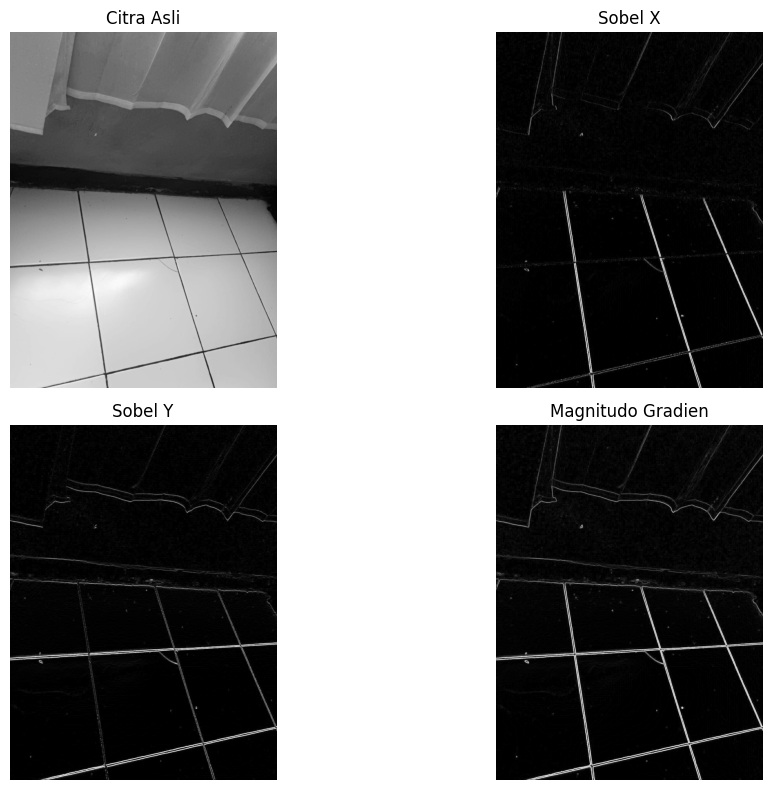

In [3]:
import cv2
import numpy as np
import matplotlib.pyplot as plt

# Membaca citra input
image_path = 'coba.jpg'
image = cv2.imread(image_path, cv2.IMREAD_GRAYSCALE)

# Menggunakan Operator Sobel
sobel_x = cv2.Sobel(image, cv2.CV_64F, 1, 0, ksize=3)  # Gradien arah x
sobel_y = cv2.Sobel(image, cv2.CV_64F, 0, 1, ksize=3)  # Gradien arah y

# Menghitung magnitudo gradien
sobel_magnitude = cv2.magnitude(sobel_x, sobel_y)

# Normalisasi untuk tampilan (konversi ke 8-bit)
sobel_x = cv2.convertScaleAbs(sobel_x)
sobel_y = cv2.convertScaleAbs(sobel_y)
sobel_magnitude = cv2.convertScaleAbs(sobel_magnitude)

# Menampilkan hasil
plt.figure(figsize=(12, 8))

plt.subplot(2, 2, 1)
plt.title("Citra Asli")
plt.imshow(image, cmap='gray')
plt.axis('off')

plt.subplot(2, 2, 2)
plt.title("Sobel X")
plt.imshow(sobel_x, cmap='gray')
plt.axis('off')

plt.subplot(2, 2, 3)
plt.title("Sobel Y")
plt.imshow(sobel_y, cmap='gray')
plt.axis('off')

plt.subplot(2, 2, 4)
plt.title("Magnitudo Gradien")
plt.imshow(sobel_magnitude, cmap='gray')
plt.axis('off')

plt.tight_layout()
plt.show()


langkah-langkah

1. Persiapan
  1.	Mengimpor Pustaka:
  o	cv2: Untuk membaca citra, menerapkan Sobel, dan melakukan pengolahan citra lainnya.
  o	numpy: Untuk pengolahan data numerik jika diperlukan.
  o	matplotlib.pyplot: Untuk menampilkan hasil secara visual.
  2.	Mempersiapkan Citra Input:
  o	Gunakan gambar dengan tepi yang cukup jelas (misalnya, bentuk geometris atau objek dengan kontras tinggi).
  o	Pastikan jalur file gambar (image_path) benar.

2. Membaca Citra

  *	Gunakan fungsi cv2.imread() untuk membaca citra dalam format grayscale:

    Implementasi di Python:

  image = cv2.imread(image_path, cv2.IMREAD_GRAYSCALE)
  *	Kenapa Grayscale? Sobel hanya membutuhkan informasi intensitas piksel (1 saluran), bukan warna (3 saluran seperti RGB).

3. Menghitung Gradien Sobel
  1.	Gradien Horizontal (GxG_xGx):
  
  	Gunakan cv2.Sobel() dengan parameter dx=1 dan dy=0 untuk menghitung perubahan intensitas pada arah horizontal.

      Implementasi di Python:
  
  sobel_x = cv2.Sobel(image, cv2.CV_64F, 1, 0, ksize=3)
  2.	Gradien Vertikal (GyG_yGy):
  
  	Gunakan cv2.Sobel() dengan parameter dx=0 dan dy=1 untuk menghitung perubahan intensitas pada arah vertikal.

   Implementasi di Python:

  sobel_y = cv2.Sobel(image, cv2.CV_64F, 0, 1, ksize=3)
  3.	Tipe Data CV64FCV_64FCV64F:
  
  	Sobel menggunakan tipe float64 untuk mempertahankan nilai negatif pada gradien.

4. Menghitung Magnitudo Gradien

	Magnitudo gradien (G) dihitung untuk menggabungkan gradien horizontal (Gx) dan vertikal (Gy): G = akar (G 2/x + G 2/y)
  
  Implementasi di Python:

sobel_magnitude = cv2.magnitude(sobel_x, sobel_y)

5. Normalisasi
*	Untuk membuat hasil terlihat pada skala 8-bit (0–255), gunakan kode:

sobel_x = cv2.convertScaleAbs(sobel_x)
sobel_y = cv2.convertScaleAbs(sobel_y)
sobel_magnitude = cv2.convertScaleAbs(sobel_magnitude)

Alasan Normalisasi:

*	Nilai gradien Sobel mentah dapat berada di luar rentang 0–255 (baik negatif maupun sangat besar). Konversi ini membuat gambar dapat ditampilkan dengan baik.

6. Menampilkan Hasil

Gunakan matplotlib.pyplot untuk menampilkan:
  1.	Citra Asli: Gambar yang akan diproses.
  2.	Gradien X: Tepi akibat perubahan intensitas horizontal.
  3.	Gradien Y: Tepi akibat perubahan intensitas vertikal.
  4.	Magnitudo Gradien: Kombinasi gradien Gx dan Gy.


Perbandingan Operator Pendeteksi Tepi

1.  Berikan perbandingan antara operator Sobel, Prewitt, dan Canny berdasarkan:
  * Akurasi pendeteksian
  * Kompleksitas komputasi

Jawab:

 Akurasi Pendeteksian
  1. Sobel
    - Akurasi cukup baik untuk mendeteksi tepi utama.
    - Memberikan bobot lebih besar pada piksel pusat, sehingga lebih halus dibanding Prewitt.
    - Sensitif terhadap noise, meskipun lebih tahan dibanding Prewitt.
  2. Prewitt
    - Akurasi lebih rendah dibanding Sobel karena tidak memberikan bobot pada piksel pusat.
    - Lebih kasar (menghasilkan tepi yang kurang halus), sehingga lebih rentan terhadap noise.
  3. Canny
    - Akurasi sangat tinggi, karena mencakup beberapa langkah (Gaussian Blur, gradien, non-maximum suppression, thresholding, dan edge tracking).
    - Mampu mendeteksi tepi dengan tingkat detail tinggi, termasuk tepi yang tipis.
    - Memiliki toleransi lebih baik terhadap noise berkat langkah Gaussian Blur sebelum deteksi gradien.

Kompleksitas Komputasi
  1. Sobel
    - Kompleksitas rendah hingga sedang.
    - Melibatkan konvolusi sederhana dengan kernel ukuran kecil (umumnya
  3×3).
  2. Prewitt
    - Kompleksitas paling rendah di antara ketiganya.
    - Kernel lebih sederhana dibanding Sobel, sehingga sedikit lebih cepat, tetapi hasilnya kurang halus.
  3. Canny
    - Kompleksitas paling tinggi.
    - Memerlukan beberapa langkah tambahan seperti Gaussian Blur (filtering), perhitungan gradien, non-maximum suppression, dan edge tracking menggunakan thresholding hysteresis.


2. Dalam situasi apa operator Canny lebih direkomendasikan dibanding operator lainnya?

Jawab:

1.   Citra dengan Tepi Tipis dan Detail Tinggi

  Canny sangat baik dalam mendeteksi tepi yang tipis dan detail yang halus. Jika citra yang Anda analisis memiliki tepi yang sangat tipis atau memerlukan akurasi tinggi dalam mendeteksi tepi objek yang rumit (misalnya, gambar medis, citra mikroskopis, atau gambar seni), Canny akan memberikan hasil yang lebih presisi dibandingkan dengan Sobel atau Prewitt.
2.   Citra dengan Banyak Noise

  Meskipun operator Canny memerlukan lebih banyak komputasi, ia dirancang untuk lebih toleran terhadap noise karena menggunakan Gaussian blur untuk mengurangi noise sebelum mendeteksi tepi. Ini membuat Canny sangat efektif untuk citra dengan banyak gangguan atau noise, yang sering terjadi pada citra yang diambil dalam kondisi pencahayaan rendah atau dari kamera yang tidak stabil.
3.   Deteksi Tepi dalam Citra yang Kompleks

  Canny lebih cocok untuk citra yang memiliki banyak variasi dalam intensitas dan memerlukan deteksi tepi yang lebih cermat.
4.   Aplikasi yang Memerlukan Tepi yang Sempurna dan Akurat

  Dalam aplikasi seperti deteksi tepi untuk analisis citra industri, di mana keakuratan deteksi tepi sangat penting untuk identifikasi dan pemrosesan lebih lanjut (misalnya, pemrograman robot, pengukuran dimensi objek, atau kualitas kontrol otomatis), Canny lebih unggul dibandingkan Sobel atau Prewitt, karena memberikan hasil yang lebih bersih dan terdefinisi dengan lebih baik.
5.   Sistem yang Mengutamakan Deteksi Tepi Tunggal

  Canny menggunakan teknik edge tracking by hysteresis, yang memungkinkan untuk mendeteksi hanya tepi yang nyata (bukan tepi palsu atau noise), sehingga lebih efektif dalam aplikasi yang memerlukan deteksi satu set tepi yang jelas tanpa gangguan.






Pendeteksian Tepi pada Citra Noisy
1.   Sebuah citra memiliki derau "salt-and-pepper". Lakukan langkah berikut:
  * Terapkan Gaussian filter untuk mengurangi derau.
  * Gunakan metode Sobel dan Canny untuk mendeteksi tepi.

Jawab:
1. Menerapkan Gaussian Filter untuk Mengurangi Derau

  Gaussian Blur dapat digunakan untuk mereduksi derau salt-and-pepper karena teknik ini menghaluskan citra dengan memperhalus perubahan intensitas piksel.
2. Deteksi Tepi Menggunakan Sobel

  Setelah mengurangi derau, kita bisa menggunakan operator Sobel untuk mendeteksi tepi berdasarkan gradien pada arah horizontal dan vertikal.
3. Deteksi Tepi Menggunakan Canny

  Setelah pengurangan derau, kita bisa menggunakan algoritma Canny untuk deteksi tepi dengan akurasi lebih tinggi.


Berikut adalah contoh kode Python menggunakan OpenCV untuk melakukan langkah-langkah tersebut:

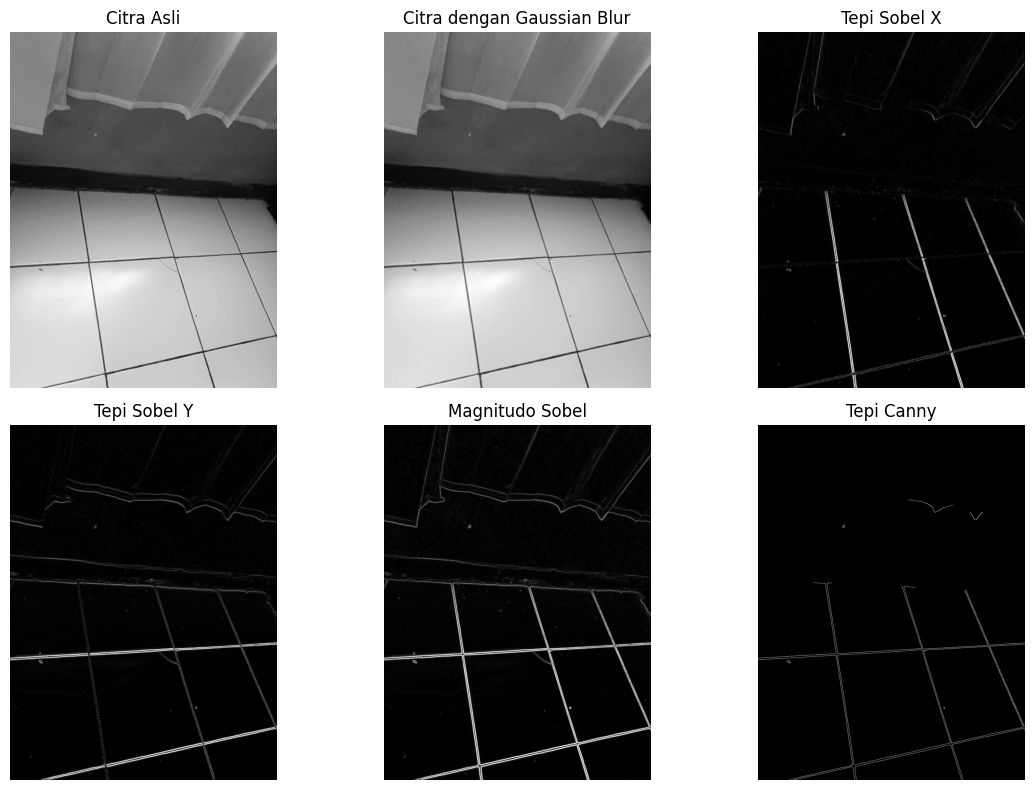

In [2]:
import cv2
import numpy as np
import matplotlib.pyplot as plt

# Membaca citra input
image_path = 'coba.jpg'
image = cv2.imread(image_path, cv2.IMREAD_GRAYSCALE)

# 1. Terapkan Gaussian Filter untuk mengurangi derau salt-and-pepper
# GaussianBlur (image, (kernel_size, kernel_size), sigmaX)
image_blurred = cv2.GaussianBlur(image, (5, 5), 0)

# 2. Deteksi Tepi dengan Operator Sobel
sobel_x = cv2.Sobel(image_blurred, cv2.CV_64F, 1, 0, ksize=3)
sobel_y = cv2.Sobel(image_blurred, cv2.CV_64F, 0, 1, ksize=3)
sobel_magnitude = cv2.magnitude(sobel_x, sobel_y)

# Normalisasi hasil Sobel
sobel_x = cv2.convertScaleAbs(sobel_x)
sobel_y = cv2.convertScaleAbs(sobel_y)
sobel_magnitude = cv2.convertScaleAbs(sobel_magnitude)

# 3. Deteksi Tepi dengan Operator Canny
# Canny(edge detection)
canny_edges = cv2.Canny(image_blurred, 100, 200)

# Menampilkan hasil
plt.figure(figsize=(12, 8))

# Citra Asli
plt.subplot(2, 3, 1)
plt.title("Citra Asli")
plt.imshow(image, cmap='gray')
plt.axis('off')

# Citra setelah Gaussian Blur
plt.subplot(2, 3, 2)
plt.title("Citra dengan Gaussian Blur")
plt.imshow(image_blurred, cmap='gray')
plt.axis('off')

# Hasil Deteksi Tepi dengan Sobel (X)
plt.subplot(2, 3, 3)
plt.title("Tepi Sobel X")
plt.imshow(sobel_x, cmap='gray')
plt.axis('off')

# Hasil Deteksi Tepi dengan Sobel (Y)
plt.subplot(2, 3, 4)
plt.title("Tepi Sobel Y")
plt.imshow(sobel_y, cmap='gray')
plt.axis('off')

# Hasil Magnitudo Gradien Sobel
plt.subplot(2, 3, 5)
plt.title("Magnitudo Sobel")
plt.imshow(sobel_magnitude, cmap='gray')
plt.axis('off')

# Hasil Deteksi Tepi dengan Canny
plt.subplot(2, 3, 6)
plt.title("Tepi Canny")
plt.imshow(canny_edges, cmap='gray')
plt.axis('off')

plt.tight_layout()
plt.show()


# New Section

2. Bandingkan hasil pendeteksian dari kedua metode dengan citra asli.

jawab:

1.sobel

Hasil Deteksi Tepi Sobel pada Citra Asli (Dengan Derau):

  * Tepi yang terdeteksi cenderung kasar dan terputus-putus, terutama di daerah dengan derau salt-and-pepper. Meskipun penghalusan menggunakan Gaussian blur membantu mengurangi sebagian besar noise, Sobel tetap rentan terhadap derau tinggi yang mungkin muncul di citra asli.
  * Sobel akan menunjukkan garis tepi yang lebih tebal dan lebih banyak noise yang terdeteksi sebagai tepi, karena ia mendeteksi perbedaan intensitas besar dengan sangat sensitif, tetapi tidak memiliki mekanisme untuk membedakan tepi nyata dari noise.
  2.Canny
  
  Hasil Deteksi Tepi Canny pada Citra Asli (Dengan Derau):

  * Hasil deteksi tepi dengan Canny akan lebih akurat dan halus dibandingkan Sobel, dengan garis tepi yang lebih jelas dan terdefinisi.
  * Canny memiliki mekanisme untuk mengurangi noise secara efektif, berkat pengaplikasian Gaussian blur untuk mengurangi efek derau sebelum pendeteksian tepi. Selain itu, langkah hysteresis memisahkan tepi nyata dari noise, sehingga tepi yang terdeteksi lebih terhubung dan terjaga.
  * Tepi lebih halus dan sedikit noise akan terlihat dalam hasil deteksi.

3.Berikan analisis hasil yang diperoleh.

Jawab:

hasil pendeteksian tepi menggunakan operator Sobel dan Canny menunjukkan perbedaan yang signifikan, terutama pada citra dengan derau salt-and-pepper. Operator Sobel menghasilkan tepi yang lebih kasar, tebal, dan terputus-putus, dengan sensitivitas tinggi terhadap noise, meskipun Gaussian filter membantu mengurangi sebagian derau. Sebaliknya, operator Canny memberikan hasil yang lebih halus, terdefinisi, dan presisi, berkat tahap non-maximum suppression dan hysteresis thresholding, yang secara efektif menyaring noise dan menghubungkan tepi yang signifikan. Sobel lebih cocok untuk aplikasi sederhana yang memprioritaskan kecepatan dan tidak memerlukan deteksi tepi dengan presisi tinggi. Di sisi lain, Canny lebih direkomendasikan untuk situasi yang membutuhkan deteksi tepi yang akurat dan bersih, meskipun dengan kebutuhan komputasi yang lebih tinggi.